Neural network takes an input layer and an output layer  

First part is linear transformation 
Second part is activation 

- On a plane, we have X | Y | a shape 
-                    -1 | -2| 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
n = 800  # number of data points
x1 = np.random.normal(size=n)
x2 = np.random.normal(size=n)
X = np.column_stack((x1, x2))  # design matrix
alpha = np.arctan2(x2, x1)
r = np.sqrt(x1**2 + x2**2)
c1 = np.sin(3*alpha + 2*r)
c2 = np.cos(3*alpha + 2*r)
## partition the sum of a sin and cosine into 5 intervals
category = pd.cut(c1 + c2,
           bins=[-1.5, -1.1, -0.6, 0.6, 1.1, 1.5],
           labels=[1, 2, 3, 4, 5])
y = category.astype(int) ## converts category to integer and we have 5 categories (color)

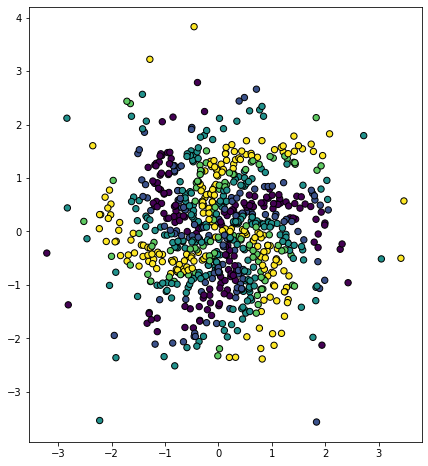

In [3]:
_ = plt.figure(figsize=(8,8))
ax = plt.axes()
_ = ax.scatter(X[:,0], X[:,1], c=y, s=40, edgecolors='black')
_ = ax.set_aspect("equal")
_ = plt.show() # we can see spiral arms yellow, green, teal, purple, dark blue

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [5]:
m = MLPClassifier(hidden_layer_sizes=(5,)) # single neural network with 5 nodes
m.fit(X,y)
m.score(X,y)
# this warning tells us it only did 200 conversions and then stopped 

/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.28625

In [7]:
m = MLPClassifier(hidden_layer_sizes=(5,),  #single hidden layer with 5 nodes
                 max_iter=10000) # increased to 10,000 and slight increase in precision
m.fit(X, y)
m.score(X, y)

0.315

In [8]:
X.shape # 800 dots and each has 2 coordinates 

(800, 2)

In [12]:
newX = np.array([[0, 0], [1, 1], [-1, -1]])
newX

array([[ 0,  0],
       [ 1,  1],
       [-1, -1]])

In [13]:
m.predict(newX)

array([3, 5, 3])

In [14]:
m.predict_proba(newX)

array([[0.19543967, 0.16611916, 0.26594563, 0.12609796, 0.2463976 ],
       [0.16550923, 0.14732797, 0.21418144, 0.16156812, 0.31141325],
       [0.18352264, 0.16007603, 0.3102205 , 0.10824285, 0.23793799]])

This network didn't perform well so lets make a better network.  

In [22]:
def DBPlot(m, X, y, nGrid = 100):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nGrid),
                           np.linspace(x2_min, x2_max, nGrid))
    XX = np.column_stack((xx1.ravel(), xx2.ravel()))
    hatyy = m.predict(XX).reshape(xx1.shape)
    plt.figure(figsize=(8,8))
    _ = plt.imshow(hatyy, extent=(x1_min, x1_max, x2_min, x2_max),
                   aspect="auto",
                   interpolation='none', origin='lower',
                   alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='k')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

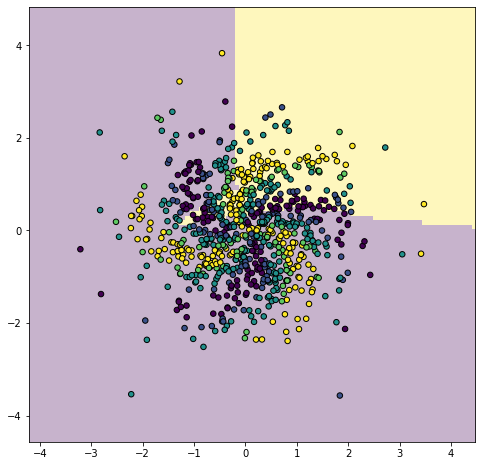

In [23]:
DBPlot(m, X, y)

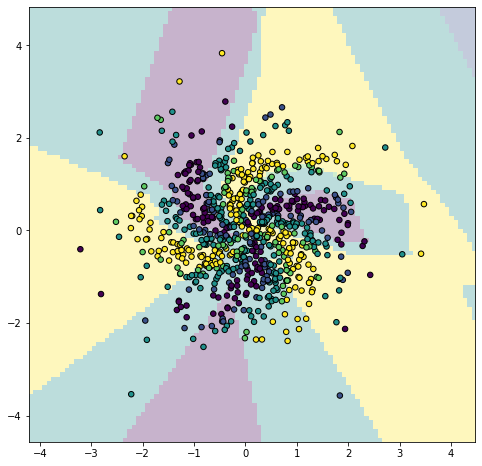

0.54375

In [24]:
m = MLPClassifier(hidden_layer_sizes=(5,5), # we have 2 hidden layers and both contain 5 nodes 
                 max_iter=10000)
m.fit(X, y)
DBPlot(m, X, y)
m.score(X, y)

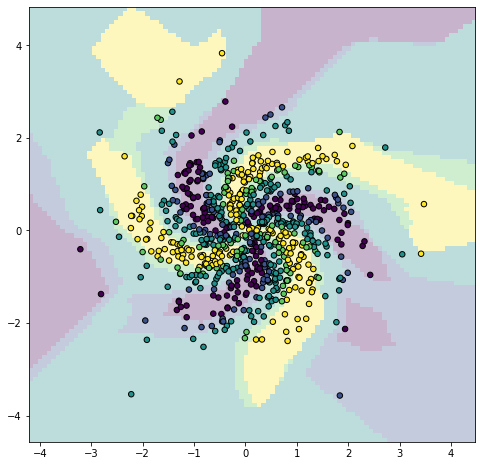

0.96

In [28]:
m = MLPClassifier(hidden_layer_sizes=(12,12,12,12), # we have 4 hidden layers and both contain 12 nodes 
                 max_iter=10000)
m.fit(X, y)
DBPlot(m, X, y)
m.score(X, y)

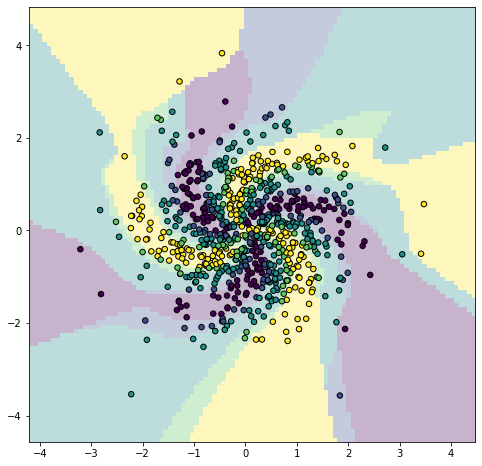

0.9875

In [29]:
m = MLPClassifier(hidden_layer_sizes=(256,128,64), # we have 4 hidden layers and both contain 12 nodes 
                 max_iter=10000)
m.fit(X, y)
DBPlot(m, X, y)
m.score(X, y)